In [ ]:
#Predict the hour-minute-second CPU Temperature based on the previous data
#Can also predict the Dates. But data loading is failed due to Memory Error.

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from datetime import datetime

In [15]:
df = pd.read_csv('cpu_temp_Jan_2020.csv', sep = '\t') #Using Jan file to predict Feb data

In [16]:
# df = df.sample(frac=0.1, random_state=101) #optional, per machine configuration
# df.head()

In [17]:
df = df.drop(['year', 'month', 'day'], axis = 1)

dummies = pd.get_dummies(df, columns = ['hour','minute','second'], 
                         prefix = ['hour','minute','second'], drop_first=True)

df = df.drop(['hour','minute','second', 'temp'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [18]:
# dummies = pd.get_dummies(df, columns = ['year','month','day','hour','minute','second'], 
#                          prefix = ['year','month','day','hour','minute','second'], drop_first=True)

# df = df.drop(['year', 'month','day','hour','minute','second', 'temp'],axis=1)
# df = pd.concat([df,dummies],axis=1)


In [19]:

datetime.now().strftime("%Y-%m-%d--%H%M")
# WINDOWS: Use "logs\\fit"
# MACOS/LINUX: Use "logs/fit"

log_directory = 'logs/fit'



# OPTIONAL: ADD A TIMESTAMP FOR UNIQUE FOLDER
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory = log_directory + '/' + timestamp


board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)



In [20]:
X = df.drop('temp', axis=1).values
y = df['temp'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [21]:
model = Sequential()

model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(loss = 'mse', optimizer='adam')

model.fit(x = X_train, y=y_train, batch_size=256, epochs=25, validation_data=(X_test, y_test), callbacks = [board])

Train on 382420 samples, validate on 95605 samples
Epoch 1/25
382420/382420 [==============================] - 13s 34us/sample - loss: 899.5465 - val_loss: 182.4440
Epoch 2/25
382420/382420 [==============================] - 11s 28us/sample - loss: 459.6823 - val_loss: 75.7909
Epoch 3/25
382420/382420 [==============================] - 11s 28us/sample - loss: 326.6558 - val_loss: 53.8293
Epoch 4/25
382420/382420 [==============================] - 11s 28us/sample - loss: 259.0522 - val_loss: 36.3702
Epoch 5/25
382420/382420 [==============================] - 11s 28us/sample - loss: 220.3447 - val_loss: 27.3175
Epoch 6/25
382420/382420 [==============================] - 11s 28us/sample - loss: 198.4774 - val_loss: 22.8198
Epoch 7/25
382420/382420 [==============================] - 11s 28us/sample - loss: 184.1026 - val_loss: 21.1198
Epoch 8/25
382420/382420 [==============================] - 11s 28us/sample - loss: 171.5587 - val_loss: 20.2194
Epoch 9/25
382420/382420 [==================

In [22]:
losses = pd.DataFrame(model.history.history)

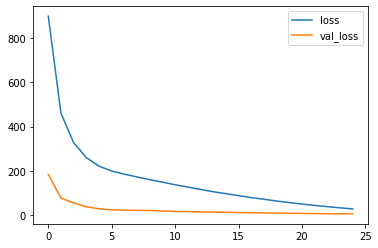

In [23]:
losses.plot()

In [28]:
newCase = "2020-02-17 23:50:27" #46
year = "year_" + str(int(newCase.split(" ")[0].split("-")[0]))
month ="month_" + str(int(newCase.split(" ")[0].split("-")[1]))
day = "day_" + str(int(newCase.split(" ")[0].split("-")[2]))
hour = "hour_" + str(int(newCase.split(" ")[1].split(":")[0]))
minute = "minute_" + str(int(newCase.split(" ")[1].split(":")[1]))
second = "second_" + str(int(newCase.split(" ")[1].split(":")[2]))

# print(year, month, day, hour, minute, second)

testData = df.drop('temp', axis = 1).iloc[0]
# print(testData)

for i in range(len(testData)): # reset the current row s
    testData[i]=0
# testData[year] = 1
# testData[month] = 1
# testData[day] = 1
testData[hour] = 1
testData[minute] = 1
testData[second] = 1

model.predict(testData.values.reshape(1,-1))


array([[46.808075]], dtype=float32)